In [2]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np

In [3]:
#Question 1 :
iris_data = pd.read_csv("/content/drive/MyDrive/Tp RN/Iris.csv")

In [4]:
#Question2
iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
#Question 3
iris_data.shape

(150, 6)

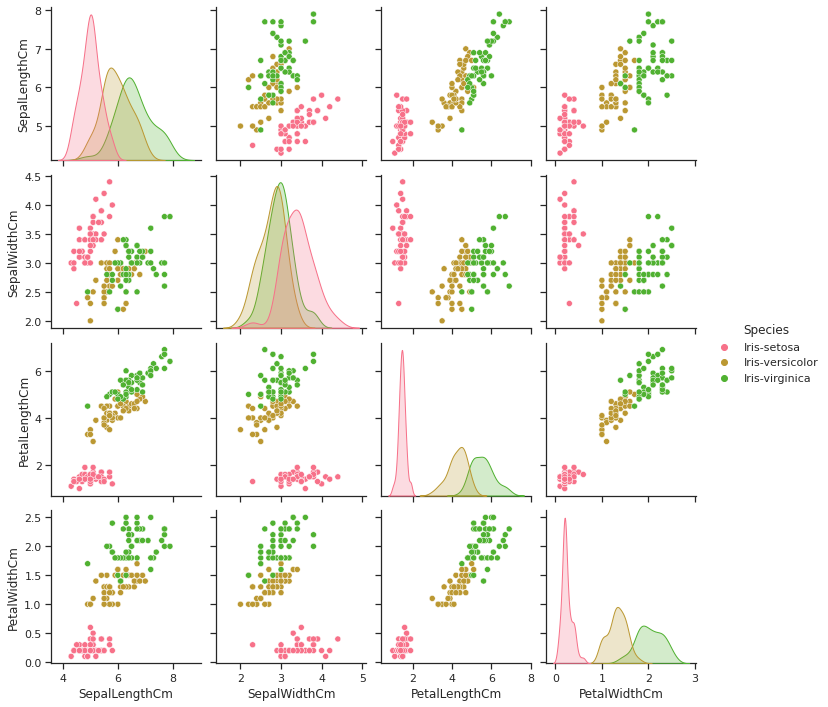

In [6]:
#Question 4 
import seaborn as sns
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(iris_data.iloc[:,1:6], hue="Species")

In [7]:
#Question5
iris_data.loc[iris_data["Species"] == "Iris-setosa" , "Species"] = 0
iris_data.loc[iris_data["Species"] == "Iris-versicolor" , "Species"] = 1
iris_data.loc[iris_data["Species"] == "Iris-virginica" , "Species"] = 2

In [8]:
#Question6
iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


In [9]:
#Question 7
from sklearn.model_selection import train_test_split

X_data = iris_data.iloc[:, 1:5].values
Y_data = iris_data.iloc[:, 5].values

X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.3)

In [10]:
#Question 8
print("\nTrain Test Dimensions:\n------------------------------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
print("\n 10 premières données d’apprentissage et celles de test (X):\n------------------------------------")
print(X_train[0:10], '\n\n', X_test[0:10])
print("\n 10 premières données d’apprentissage et celles de test (Y):\n------------------------------------")
print(Y_train[0:10], '\n\n', Y_test[0:10])


Train Test Dimensions:
------------------------------------
(105, 4) (105,) (45, 4) (45,)

 10 premières données d’apprentissage et celles de test (X):
------------------------------------
[[7.7 3.8 6.7 2.2]
 [6.2 2.2 4.5 1.5]
 [5.4 3.9 1.7 0.4]
 [5.2 3.5 1.5 0.2]
 [7.2 3.  5.8 1.6]
 [6.1 3.  4.6 1.4]
 [7.2 3.6 6.1 2.5]
 [6.8 3.2 5.9 2.3]
 [4.4 3.2 1.3 0.2]
 [5.5 4.2 1.4 0.2]] 

 [[5.7 2.8 4.5 1.3]
 [4.8 3.1 1.6 0.2]
 [4.3 3.  1.1 0.1]
 [4.6 3.6 1.  0.2]
 [4.6 3.2 1.4 0.2]
 [5.8 2.6 4.  1.2]
 [5.  3.4 1.5 0.2]
 [6.7 3.1 4.4 1.4]
 [5.5 2.4 3.8 1.1]
 [5.7 2.9 4.2 1.3]]

 10 premières données d’apprentissage et celles de test (Y):
------------------------------------
[2 1 0 0 2 1 2 2 0 0] 

 [1 0 0 0 0 1 0 1 1 1]


In [43]:
#Question 9
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), epsilon=0.07, max_iter=150)
classifier.fit(X_train, Y_train.astype('int'))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, epsilon=0.07, hidden_layer_sizes=(3, 3),
              max_iter=150, solver='lbfgs')

In [44]:
#Question 10
prediction = classifier.predict(X_test)
print(prediction)

[1 0 0 0 0 1 0 1 1 1 1 0 0 2 2 1 1 2 1 0 1 2 2 2 1 2 1 1 0 1 2 0 1 1 1 1 0
 2 0 0 0 0 2 0 0]


In [45]:
Y_test.astype('int')

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 2,
       2, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 2, 0,
       0])

In [46]:
from sklearn import metrics
print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(prediction,Y_test.astype('int')))

The accuracy of the Multi-layer Perceptron is: 0.9111111111111111


[[16  0  0]
 [ 1 15  0]
 [ 0  3 10]]


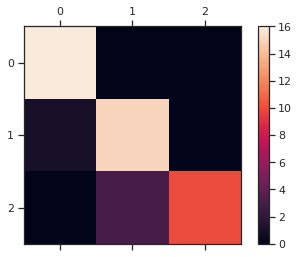

In [47]:
#Question 11
import matplotlib.pyplot as plt
import numpy
confusion_mat =metrics.confusion_matrix(Y_test.tolist(), prediction.tolist())

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion_mat)
fig.colorbar(cax)
print(confusion_mat)
plt.show()

/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

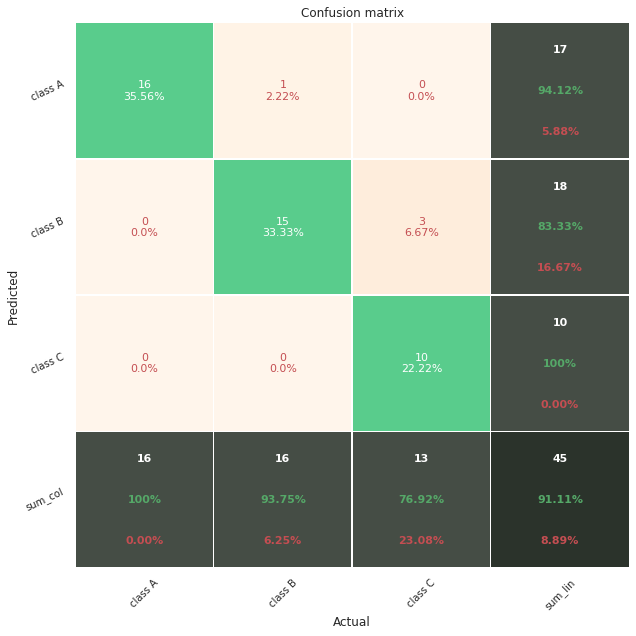

In [48]:
# deuxiéme bib pour la matrice de confusion
from pretty_confusion_matrix import pp_matrix_from_data
t = np.array(Y_test.tolist())
p = np.array(prediction.tolist())
pp_matrix_from_data(t, p)

In [23]:
#Question 12
print(metrics.classification_report(prediction, Y_test.astype('int')))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.84      0.91        19
           2       0.77      1.00      0.87        10

    accuracy                           0.93        45
   macro avg       0.92      0.95      0.93        45
weighted avg       0.95      0.93      0.93        45



#Question 12
Modèle d'apprentissage caractérisé par une accurancy élevée = 91,11 % 


1.   Pour les individus de la classe 0 ( Iris_Setosa ) , 16 sur 16 ont bien été identifiés comme appartenant à cette classe
2.   Pour les individus de la classe 1 (Iris_Versicolor), 15 sur 16 ont bien été identifiés.
3.  Pour les individus de la classe 2 (Iris_Virginica),10 sur 13 ont bien été identifiés.


* Dans notre cas, on peut observer une Precision de 100% pour la classe 1. Cela est tout simplement dû au fait que toutes individu de classe réel 0 est prédit correctement. les individus de la classe 1 (15 biens classés, 1 mal classé), les précision de class 2 = 77% .   

aussi on a le recall aussi, le score de classification chaque classe: 

    1. recall élevé pour toutes les classes
    2. tous scores sont proches de 1

alors notre perceptron est très efficace en matière de ( précision, recall et score)




In [ ]:
#Question 13
# different learning rate schedules and momentum parameters
params = [
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "learning_rate_init": 0.2,
        "max_iter" : 150
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "learning_rate_init": 0.7,
        "max_iter" : 150
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "learning_rate_init": 0.2,
        "max_iter" : 150
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "learning_rate_init": 0.7,
        "max_iter" : 150
    },
    {"solver": "adam", "learning_rate_init": 0.01},
]

labels = [
    "constant learning-rate 0.2",
    "constant learning-rate 0.7",
    "inv-scaling learning-rate 0.2",
    "inv-scaling learning-rate 0.7",
    "adam 0.01",
]

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

dataClassifiers = []
for i in range(len(params)):
  classifier = MLPClassifier(random_state=0, **params[i])
  classifier.fit(X_train, Y_train.astype('int'))
  print(labels[i]," : ",classifier.score(X_train, Y_train.astype('int')))
  dataClassifiers.append(classifier)



constant learning-rate 0.2  :  0.3142857142857143
constant learning-rate 0.7  :  0.4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


inv-scaling learning-rate 0.2  :  0.9809523809523809
inv-scaling learning-rate 0.7  :  0.9904761904761905
adam 0.01  :  1.0


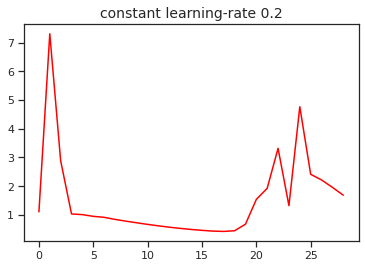

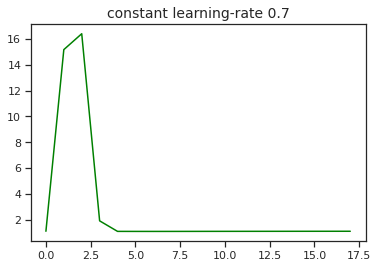

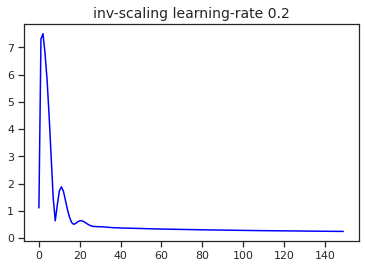

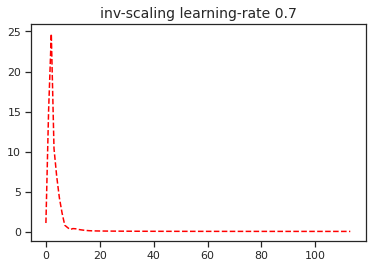

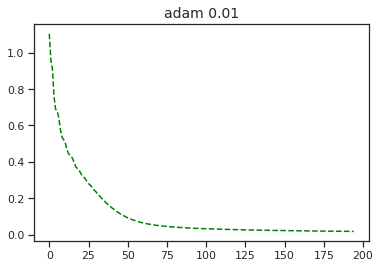

In [ ]:
#Question 14

plot_args = [
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
    {"c": "red", "linestyle": "--"},
    {"c": "green", "linestyle": "--"},
]

for i in range(len(dataClassifiers)):
  plt.plot(dataClassifiers[i].loss_curve_, **plot_args[i])
  plt.title(labels[i], fontsize=14)
  plt.show()

# Question15


In [62]:
classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), epsilon=0.07, max_iter=1500)
classifier.fit(X_train, Y_train.astype('int'))
prediction = classifier.predict(X_test)
print(prediction)
print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(prediction,Y_test.astype('int')))

[1 0 0 0 0 1 0 1 1 1 1 0 0 2 2 2 2 2 1 0 1 2 2 2 2 2 1 1 0 1 2 0 1 1 1 1 0
 2 0 1 0 0 2 0 0]
The accuracy of the Multi-layer Perceptron is: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [63]:
print(metrics.classification_report(prediction, Y_test.astype('int')))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



accuracy 100 %
recall 100 %
score 100 % 


mais on est tombé sur cette result après 5 exécutions different, alors cette valeur est variable selon le dataset, selon l'apprentissage du modèle aussi nombre d'iteration.

mais cette prediction est efficace, parfaite.

In [ ]:
  #Question 16
from sklearn import preprocessing
from tensorflow import keras

label_encoder = preprocessing.LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(
                                iris_data['Species'])
np_iris = iris_data.to_numpy()
X_data = np_iris[:,0:4]
Y_data=np_iris[:,4]
scaler = StandardScaler().fit(X_data)
X_data = scaler.transform(X_data)
Y_data = tf.keras.utils.to_categorical(Y_data,3)
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.3)


#Number of classes in the target variable
NB_CLASSES=3

#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

#Add the first hidden layer
model.add(keras.layers.Dense(128,                    #Number of nodes
                             input_shape=(4,),       #Number of input variables
                              name='Hidden-Layer-1', #Logical name
                              activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

#Print the model meta-data
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


Le phénomène constaté est le surapprentissage (overfitting).
La solution pour ce problème est de diviser la base en deux parties: base d'apprentissage est base de test.


Training Progress:
------------------------------------
Epoch 1/10
6/6 [==============================] - 1s 56ms/step - loss: 0.8939 - accuracy: 0.6905 - val_loss: 0.6613 - val_accuracy: 0.8095
Epoch 2/10
6/6 [==============================] - 0s 9ms/step - loss: 0.6109 - accuracy: 0.8095 - val_loss: 0.5216 - val_accuracy: 0.9524
Epoch 3/10
6/6 [==============================] - 0s 12ms/step - loss: 0.5047 - accuracy: 0.8810 - val_loss: 0.4495 - val_accuracy: 0.9048
Epoch 4/10
6/6 [==============================] - 0s 11ms/step - loss: 0.4324 - accuracy: 0.8810 - val_loss: 0.4083 - val_accuracy: 0.9048
Epoch 5/10
6/6 [==============================] - 0s 10ms/step - loss: 0.3954 - accuracy: 0.8810 - val_loss: 0.3678 - val_accuracy: 0.9048
Epoch 6/10
6/6 [==============================] - 0s 9ms/step - loss: 0.3506 - accuracy: 0.9048 - val_loss: 0.3379 - val_accuracy: 0.9048
Epoch 7/10
6/6 [==============================] - 0s 10ms/step - loss: 0.3263 - accuracy: 0.8810 - val_loss: 0.

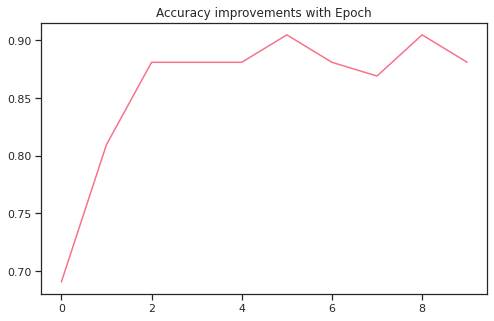


Evaluation against Test Dataset :
------------------------------------
2/2 [==============================] - 0s 7ms/step - loss: 0.2946 - accuracy: 0.9111


[0.2946052551269531, 0.9111111164093018]

In [ ]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=16
#Set number of epochs
EPOCHS=10
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(X_train,
          Y_train.astype('int'),
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)


Training Progress:
------------------------------------
Epoch 1/100
6/6 [==============================] - 0s 28ms/step - loss: 0.2636 - accuracy: 0.8929 - val_loss: 0.3196 - val_accuracy: 0.8095
Epoch 2/100
6/6 [==============================] - 0s 22ms/step - loss: 0.2835 - accuracy: 0.8690 - val_loss: 0.2888 - val_accuracy: 0.8571
Epoch 3/100
6/6 [==============================] - 0s 18ms/step - loss: 0.2521 - accuracy: 0.9167 - val_loss: 0.2617 - val_accuracy: 0.9048
Epoch 4/100
6/6 [==============================] - 0s 19ms/step - loss: 0.2446 - accuracy: 0.8929 - val_loss: 0.2518 - val_accuracy: 0.8571
Epoch 5/100
6/6 [==============================] - 0s 22ms/step - loss: 0.2509 - accuracy: 0.9167 - val_loss: 0.2487 - val_accuracy: 0.9048
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 0.2357 - accuracy: 0.9048 - val_loss: 0.2617 - val_accuracy: 0.8571
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.2336 - accuracy: 0.9048 - val_

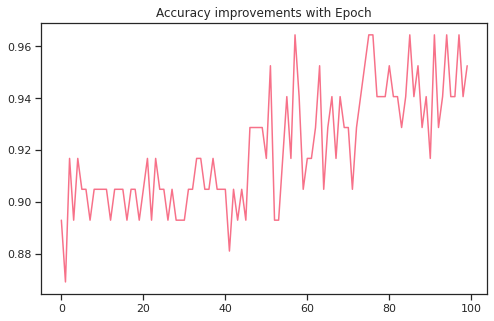


Evaluation against Test Dataset :
------------------------------------
2/2 [==============================] - 0s 7ms/step - loss: 0.5825 - accuracy: 0.8444


[0.5824515223503113, 0.8444444537162781]

In [ ]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=16
#Set number of epochs
EPOCHS=100
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(X_train,
          Y_train.astype('int'),
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

In [ ]:
#enregistrer le model
model.save("iris_save")
loaded_model = keras.models.load_model("iris_save")
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Raw prediction data
prediction_input = [[5.1,3.5,1.4,0.2]]
scaled_input = scaler.transform(prediction_input)
#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)
#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 23ms/step
Raw Prediction Output (Probabilities) : [[9.9999952e-01 5.0850963e-07 0.0000000e+00]]
Prediction is  [0]


In [ ]:
#Raw prediction data
prediction_input = [[5.1,3.5,1.4,17]]
scaled_input = scaler.transform(prediction_input)
#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)
#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 24ms/step
Raw Prediction Output (Probabilities) : [[0.0000000e+00 1.0000000e+00 3.3675906e-18]]
Prediction is  [1]


**Même modèles les 1ers 10 epochs sont l'autre 100 epoch** 

la phénomen est overFitting : Overfitting is a concept in data science, which occurs when a statistical model fits exactly against its training data. When this happens, the algorithm unfortunately cannot perform accurately against unseen data, defeating its purpose. Generalization of a model to new data is ultimately what allows us to use machine learning algorithms every day to make predictions and classify data.




*   10 epoch :

    loss: 0.2946 - accuracy: 0.9111


*  100 epoch :

    loss: 0.5825 - accuracy: 0.8444


**accuracy de model avec 10 epoch est plus efficase que le model avec 100 epoch parce que :**

[loss] : model(10 epoch) < model(100 epoch)

[accuracy] : model(10 epoch) > model(100 epoch)


**aussi d'après les deux courbes :**




1.   le modèle est atteint l'accuracy le plus fort dans l'epoch 8
2.   mais dans la deuxième courbe en a atteint 96% comme accuracy et loss = 0.22 . et dans l'epoch 100 on est tombé sur un résultat mauvais.

-> alors comme conclusion il faut faire plusieurs tests sur des paramètres different pour conclure combien d'epoch nécessaire pour atteindre le maximum Accuracy et minimum loss

# Question 17
si le problème dépend des conditions temporelles c'est intéressant à utiliser modèle récurrent sinon dans notre cas de la base de fleur statique IRIS il n y a pas aucune évolution au cours du temps . alors n'est pas intéressant d'utiliser un réseaux de neurones récurrent dans notre dataset.

